In [1]:
# Import reqired libraries
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import norm
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import gaussian_kde
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width to a high value

In [2]:
# Function to print colored text
def print_colored(text, color):
    color_codes = {
        'black': '0;30',
        'red': '0;31',
        'green': '0;32',
        'yellow': '0;33',
        'blue': '0;34',
        'purple': '0;35',
        'cyan': '0;36',
        'white': '0;37',
        'bold_black': '1;30',
        'bold_red': '1;31',
        'bold_green': '1;32',
        'bold_yellow': '1;33',
        'bold_blue': '1;34',
        'bold_purple': '1;35',
        'bold_cyan': '1;36',
        'bold_white': '1;37'
    }
    color_code = color_codes.get(color, '0;30')  # Default to white if color not found
    print(f"\033[{color_code}m{text}\033[0m")

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        #'text.latex.preamble' : [r'\usepackage{amsmath}'],
        'mathtext.fontset' : 'stix',
        'mathtext.rm' : 'serif'
}
mpl.rcParams.update(nice_fonts)

# Define colors and line styles for each asset
styles = {
    'AAPL': {'color': 'blue', 'linestyle': '-'},
    'MSFT': {'color': 'orange', 'linestyle': '--'},
    'GOOGL': {'color': 'green', 'linestyle': '-.'},
    'AMZN': {'color': 'red', 'linestyle': ':'},
    'TSLA': {'color': 'purple', 'linestyle': '-'},
    'SPY': {'color': 'brown', 'linestyle': '--'},
    'GLD': {'color': 'pink', 'linestyle': '-'}
}

In [3]:
# List of assets
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'SPY', 'GLD']

# Create a dictionary to store dataframes for each asset
data = {}

# Loop through each asset to load
for asset in assets:
    # Define the file path
    file_path = f'../data/{asset}_enhanced_data.csv'
    
    # Load the data into a DataFrame
    df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    data[asset] = df

In [4]:
for asset, df in data.items():
    duplicate_rows_df = df [df.duplicated()]
    #print("Number of duplicate rows: ", duplicate_rows_df.shape)
    #print(df.count())
    df = df.drop_duplicates ()
    data[asset] = df

In [5]:
for asset, df in data.items():
  print_colored(f"\n{asset} Missing Values:", "blue")
  print(df.isnull().sum())


AAPL Missing Values:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
MA20            0
MA50            0
EMA20           0
EMA50           0
RSI             0
MACD            0
Signal Line     0
Volatility      0
Upper Band      0
Lower Band      0
Lag_1           0
Lag_2           0
Lag_3           0
dtype: int64

MSFT Missing Values:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
MA20            0
MA50            0
EMA20           0
EMA50           0
RSI             0
MACD            0
Signal Line     0
Volatility      0
Upper Band      0
Lower Band      0
Lag_1           0
Lag_2           0
Lag_3           0
dtype: int64

GOOGL Missing Values:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
MA20            0
MA50            0
EMA20           0
EMA50  

In [6]:
def plot_asset_data(data, column=None, ylabel=None, xlim=None, ylim=None):
    """
    Plots the specified column for each asset in the provided data.

    Parameters:
    - data: Dictionary of DataFrames containing asset data.
    - column: The column to plot (e.g., 'Close', 'Open', etc.).
    - xlim: Tuple for x-axis limits (start_date, end_date).
    - ylim: Tuple for y-axis limits (y_min, y_max).
    """
    plt.figure(figsize=(12, 6))

    # Plot each asset with distinct styles
    for asset, df in data.items():
        plt.plot(df.index, df[column], label=asset, **styles[asset])

    # Highlight global events
    plt.axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)#, label='Dot-com Bubble')
    plt.axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)#, label='Financial Crisis')
    plt.axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)#, label='COVID-19 Pandemic')

    # Format the plot
    plt.title(f'{column} of Different Assets')
    plt.xlabel('Date')
    plt.ylabel(f'{ylabel}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)

    # Set x and y limits if provided
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    plt.tight_layout()
    plt.show()

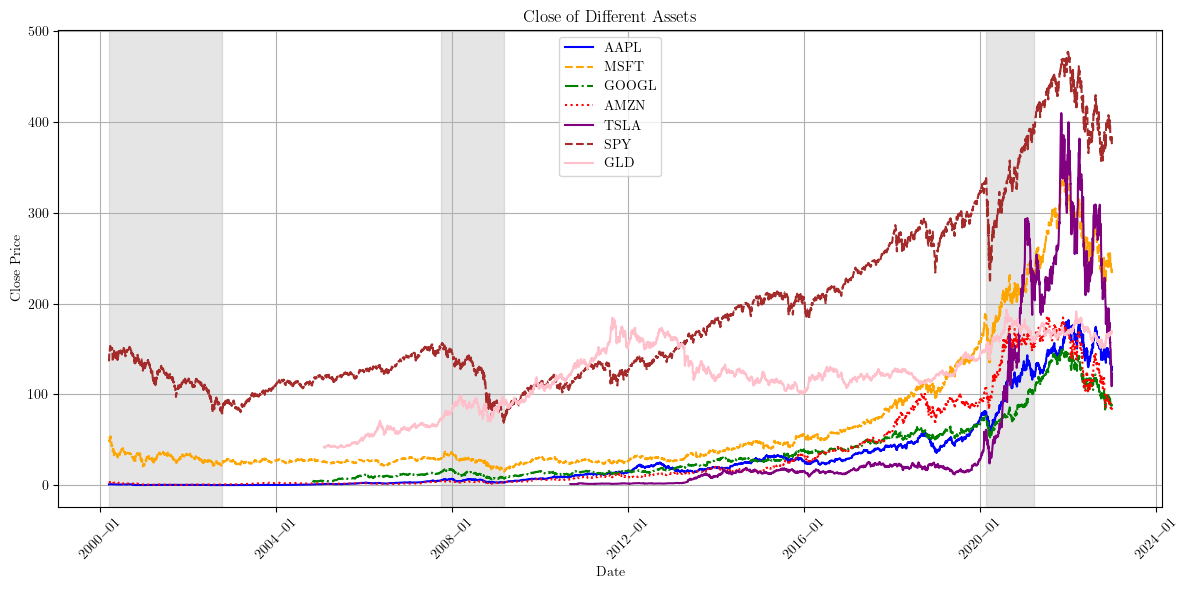

In [7]:
# Plotting the "Close" price
plot_asset_data(data, column='Close', ylabel='Close Price')

### Dot-com Bubble (2000-2002) analysis:

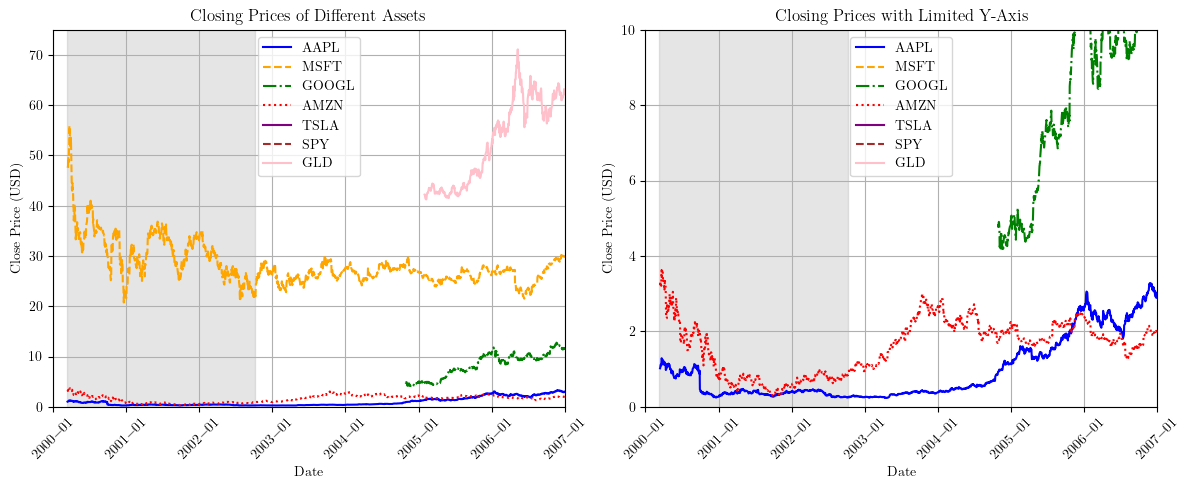

In [8]:
# Improved plot with distinct colors and line styles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot each asset with distinct styles on the first subplot
for asset, df in data.items():
    axes[0].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the first subplot
axes[0].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the first subplot
axes[0].set_title('Closing Prices of Different Assets')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price (USD)')
axes[0].set_xlim(datetime(2000, 1, 1), datetime(2007, 1, 1))
axes[0].set_ylim(0, 75)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True)

# Plot each asset with distinct styles on the second subplot
for asset, df in data.items():
    axes[1].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the second subplot
axes[1].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the second subplot
axes[1].set_title('Closing Prices with Limited Y-Axis')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price (USD)')
axes[1].set_xlim(datetime(2000, 1, 1), datetime(2007, 1, 1))
axes[1].set_ylim(0, 10)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Global Financial Crisis (2008-2009) analysis:

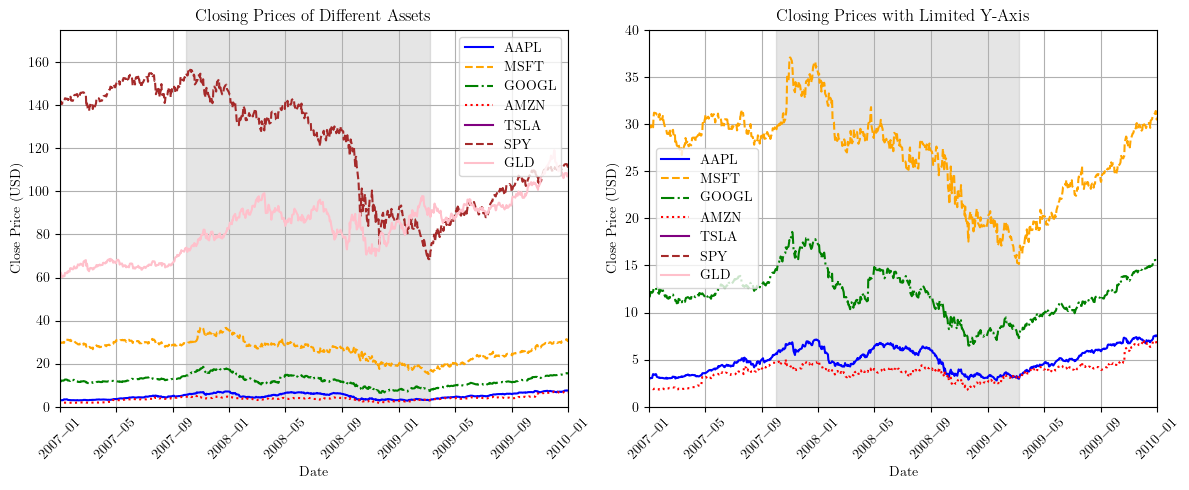

In [9]:
# Improved plot with distinct colors and line styles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define colors and line styles for each asset
styles = {
    'AAPL': {'color': 'blue', 'linestyle': '-'},
    'MSFT': {'color': 'orange', 'linestyle': '--'},
    'GOOGL': {'color': 'green', 'linestyle': '-.'},
    'AMZN': {'color': 'red', 'linestyle': ':'},
    'TSLA': {'color': 'purple', 'linestyle': '-'},
    'SPY': {'color': 'brown', 'linestyle': '--'},
    'GLD': {'color': 'pink', 'linestyle': '-'}
}

# Plot each asset with distinct styles on the first subplot
for asset, df in data.items():
    axes[0].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the first subplot
axes[0].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the first subplot
axes[0].set_title('Closing Prices of Different Assets')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price (USD)')
axes[0].set_xlim(datetime(2007, 1, 1), datetime(2010, 1, 1))
axes[0].set_ylim(0, 175)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True)

# Plot each asset with distinct styles on the second subplot
for asset, df in data.items():
    axes[1].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the second subplot
axes[1].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the second subplot
axes[1].set_title('Closing Prices with Limited Y-Axis')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price (USD)')
axes[1].set_xlim(datetime(2007, 1, 1), datetime(2010, 1, 1))
axes[1].set_ylim(0, 40)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### COVID-19 Pandemic (2020-2021) analysis:

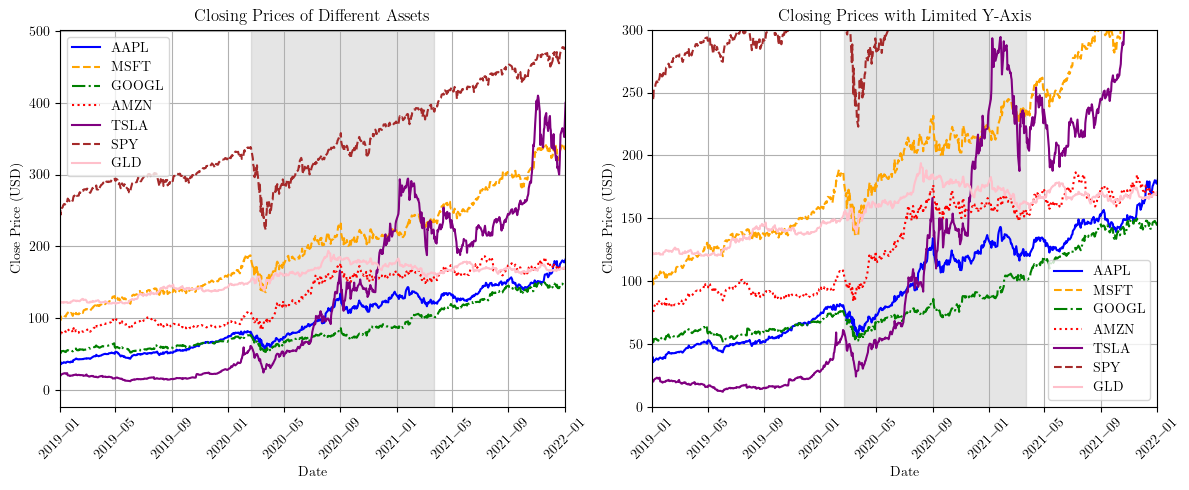

In [10]:
# Improved plot with distinct colors and line styles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define colors and line styles for each asset
styles = {
    'AAPL': {'color': 'blue', 'linestyle': '-'},
    'MSFT': {'color': 'orange', 'linestyle': '--'},
    'GOOGL': {'color': 'green', 'linestyle': '-.'},
    'AMZN': {'color': 'red', 'linestyle': ':'},
    'TSLA': {'color': 'purple', 'linestyle': '-'},
    'SPY': {'color': 'brown', 'linestyle': '--'},
    'GLD': {'color': 'pink', 'linestyle': '-'}
}

# Plot each asset with distinct styles on the first subplot
for asset, df in data.items():
    axes[0].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the first subplot
axes[0].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[0].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the first subplot
axes[0].set_title('Closing Prices of Different Assets')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price (USD)')
axes[0].set_xlim(datetime(2019, 1, 1), datetime(2022, 1, 1))
#axes[0].set_ylim(0, 175)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True)

# Plot each asset with distinct styles on the second subplot
for asset, df in data.items():
    axes[1].plot(df.index, df['Close'], label=asset, **styles[asset])

# Highlight global events on the second subplot
axes[1].axvspan(datetime(2000, 3, 10), datetime(2002, 10, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2007, 10, 1), datetime(2009, 3, 9), color='gray', alpha=0.2)
axes[1].axvspan(datetime(2020, 2, 20), datetime(2021, 3, 23), color='gray', alpha=0.2)

# Set plot limits and formatting for the second subplot
axes[1].set_title('Closing Prices with Limited Y-Axis')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price (USD)')
axes[1].set_xlim(datetime(2019, 1, 1), datetime(2022, 1, 1))
axes[1].set_ylim(0, 300)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Summary:

- Dot-com Bubble (2000-2002):
    - Technology Stocks (AAPL, MSFT, AMZN): Experienced significant declines during the burst of the dot-com bubble, reflecting the broader market trend in tech sectors. This period is characterized by high volatility and sharp drops in prices.
    - GOOGL: Not included in this period as Google IPO was in 2004.

- Global Financial Crisis (2008-2009):
    - SPY: As an ETF tracking the S&P 500, SPY shows a clear decline, representing the broader market downturn.
    - AAPL, MSFT, GOOGL: These stocks also show significant declines, although AAPL begins to show some recovery towards the end of this period.
    - GLD: Gold typically acts as a safe-haven asset, showing stability and some upward movement during the crisis.

- COVID-19 Pandemic (2020-2021):
    - SPY, AAPL, AMZN, GOOGL, TSLA: These assets show a sharp initial decline followed by rapid recovery. The tech stocks, in particular, exhibit growth as the pandemic accelerated reliance on technology and e-commerce.
    - TSLA: Experienced a notable increase, reflecting its volatility and growth during this period.
    - GLD: Again shows stability, reinforcing its role as a hedge against market volatility.

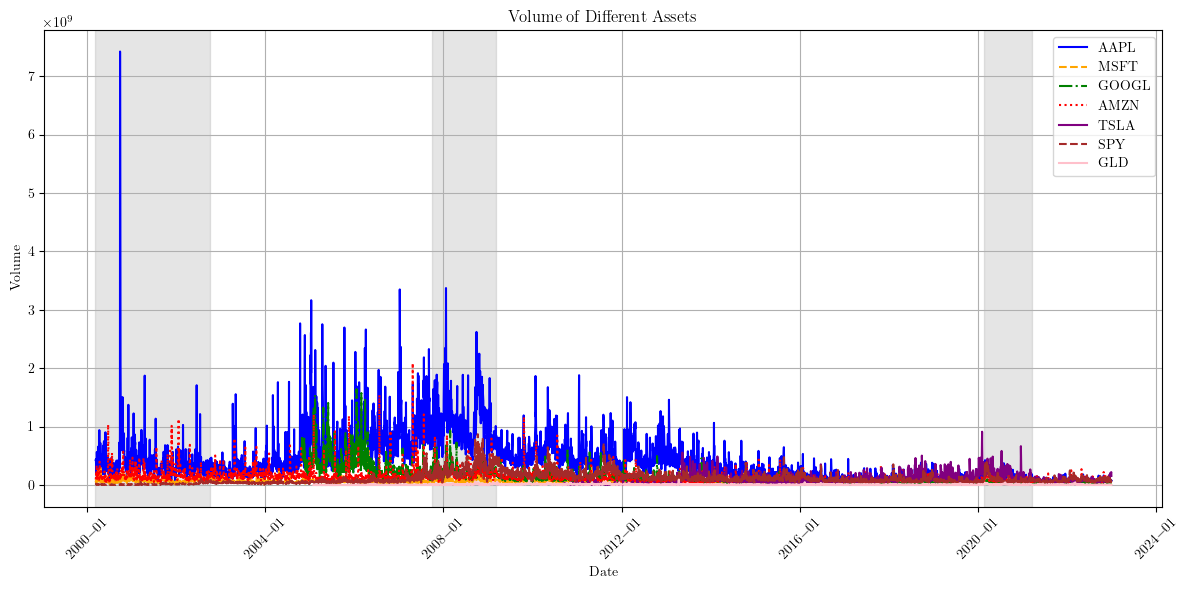

In [11]:
# Plotting the "Volume"
plot_asset_data(data, column='Volume', ylabel='Volume')

Apple's 2000 Peak: Apple's peak in trading volume in 2000 was largely driven by the dot-com bubble's speculative trading environment, combined with Apple's strategic product launches and market presence.
Tesla's Post-2018 Surge: Tesla's trading volume surpassing Apple's after 2018 reflects its rapid growth, pivotal role in the EV market, inclusion in major indices, and appeal to retail investors, driven by a mix of strategic business moves and broader market trends favoring technology and sustainability.

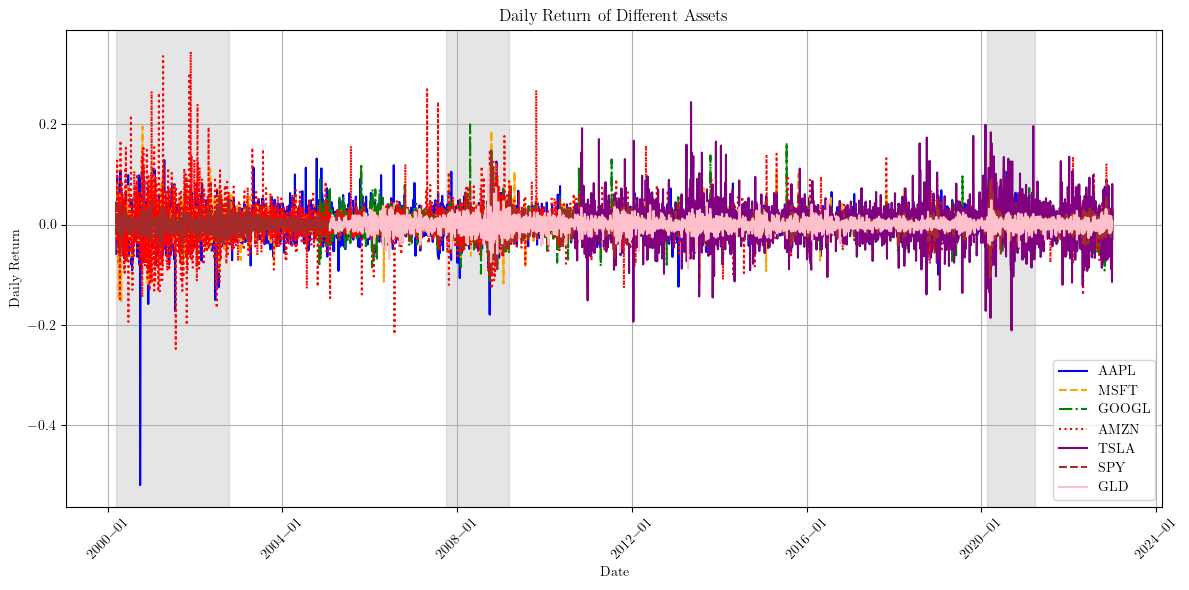

In [12]:
# Plotting the "Daily Return"
plot_asset_data(data, column='Daily Return', ylabel='Daily Return')

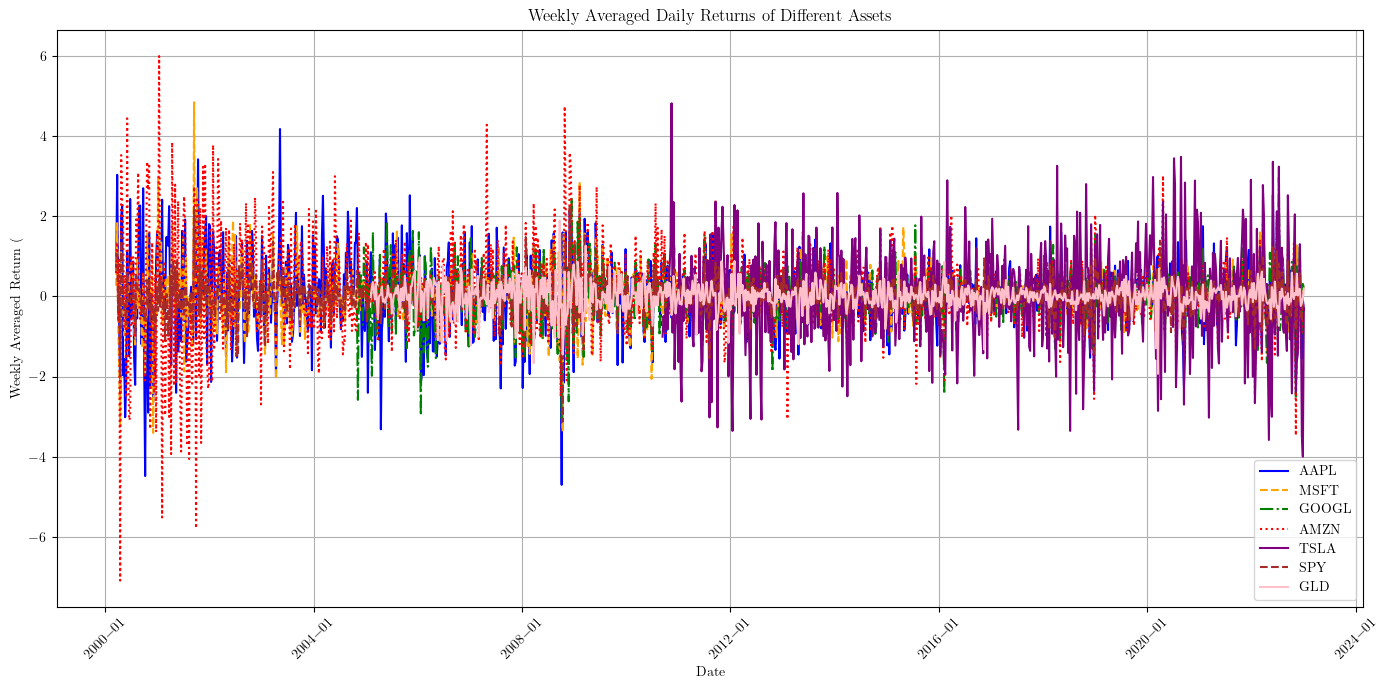

In [13]:
# Define colors and line styles for each asset
styles = {
    'AAPL': {'color': 'blue', 'linestyle': '-'},
    'MSFT': {'color': 'orange', 'linestyle': '--'},
    'GOOGL': {'color': 'green', 'linestyle': '-.'},
    'AMZN': {'color': 'red', 'linestyle': ':'},
    'TSLA': {'color': 'purple', 'linestyle': '-'},
    'SPY': {'color': 'brown', 'linestyle': '--'},
    'GLD': {'color': 'pink', 'linestyle': '-'}
}

def calculate_daily_return(df):
    """
    Calculate the daily return as a percentage.
    
    Parameters:
    - df: DataFrame containing the asset data.
    
    Returns:
    - DataFrame with an added 'return_val' column for daily returns.
    """
    df['return_val'] = ((df['Close'] - df['Open']) / df['Open']) * 100
    return df

def plot_weekly_averaged_returns(data):
    """
    Plot the weekly averaged daily returns for all assets.
    
    Parameters:
    - data: Dictionary of DataFrames containing asset data.
    """
    plt.figure(figsize=(14, 7))
    
    for asset, df in data.items():
        # Calculate daily returns
        df = calculate_daily_return(df)
        
        # Resample to get weekly average returns
        weekly_avg_return = df['return_val'].resample('W').mean()
        
        # Plot weekly averaged returns
        plt.plot(weekly_avg_return.index, weekly_avg_return, label=asset, **styles[asset])
    
    # Format the plot
    plt.title('Weekly Averaged Daily Returns of Different Assets')
    plt.xlabel('Date')
    plt.ylabel('Weekly Averaged Return (%)')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the weekly averaged daily returns
plot_weekly_averaged_returns(data)

In [14]:
# Function to plot correlation matrix and pairplot for a specified column
def plot_stock_data(data, column='Close'):
    """
    Plot correlation matrix and pairplot for a specified column in the stock data.
    
    Parameters:
    - data: Dictionary of DataFrames containing stock data.
    - column: The column to plot (e.g., 'Close', 'Open', 'Volume', etc.).
    """
    # Extract specified column into a DataFrame
    stock_data = pd.DataFrame({name: df[column] for name, df in data.items()})

    # Calculate the correlation matrix
    correlation_matrix = stock_data.corr()

    print(correlation_matrix)

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title(f'Correlation Matrix of {column} Prices')
    plt.show()

    # Plot a pairplot of the specified column with KDE
    sns.pairplot(stock_data, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50}, diag_kws={'fill': True})

    # Add title and show plot
    plt.suptitle(f'Pairplot of {column} Prices', y=1.02)
    plt.show()

           AAPL      MSFT     GOOGL      AMZN      TSLA       SPY       GLD
AAPL   1.000000  0.981602  0.972274  0.945416  0.952905  0.953346  0.668617
MSFT   0.981602  1.000000  0.978728  0.961229  0.919253  0.950781  0.609060
GOOGL  0.972274  0.978728  1.000000  0.955909  0.912889  0.980810  0.630820
AMZN   0.945416  0.961229  0.955909  1.000000  0.820951  0.955696  0.635697
TSLA   0.952905  0.919253  0.912889  0.820951  1.000000  0.862100  0.606449
SPY    0.953346  0.950781  0.980810  0.955696  0.862100  1.000000  0.608295
GLD    0.668617  0.609060  0.630820  0.635697  0.606449  0.608295  1.000000


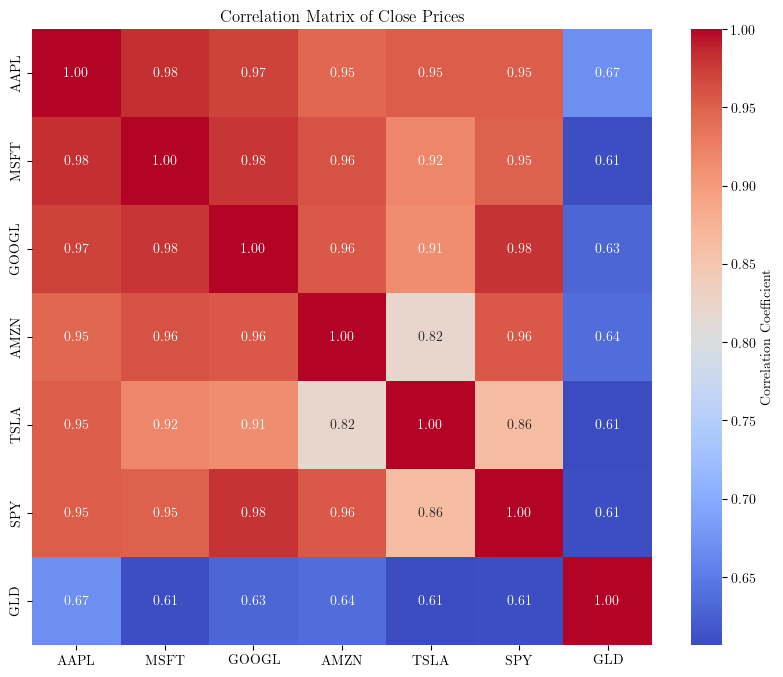

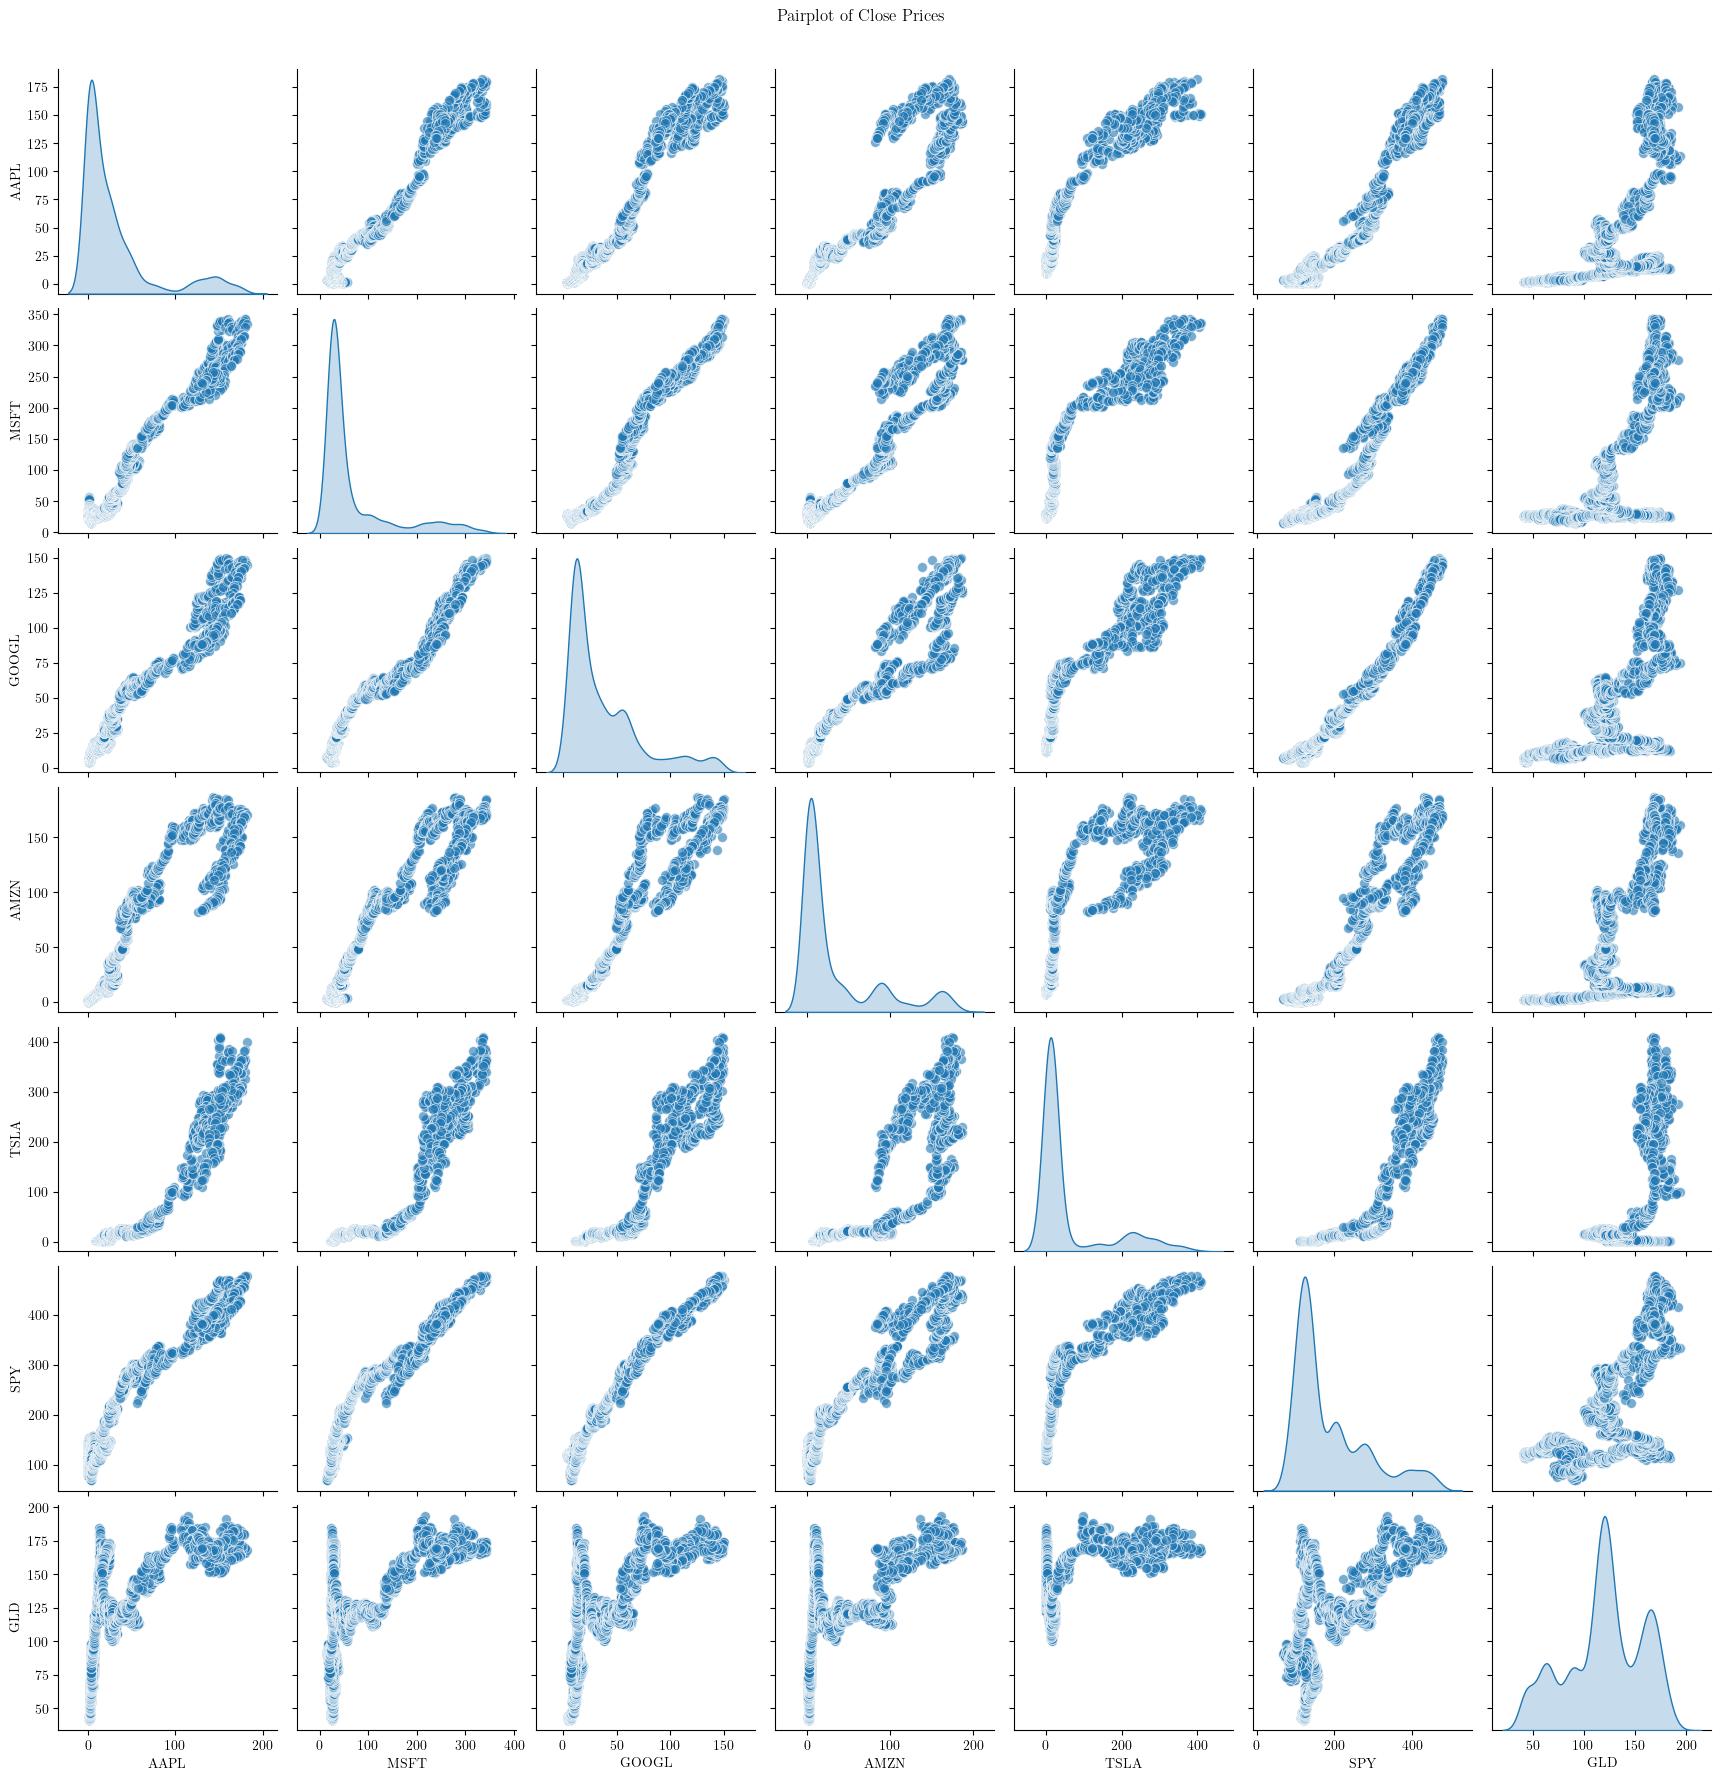

In [15]:
# Plotting "Close" prices
plot_stock_data(data, column='Close')

## Correlation Matrix of Close
Overall, the correlation matrix of Close reveals that major tech stocks (AAPL, MSFT, GOOGL, and AMZN) are highly correlated with each other, indicating they generally move in tandem. This high correlation is often due to shared economic and market factors affecting the technology sector as a whole. However, the gold ETF (GLD) shows lower correlation with these assets, highlighting its role as a potential hedge against market fluctuations.

           AAPL      MSFT     GOOGL      AMZN      TSLA       SPY       GLD
AAPL   1.000000  0.466386  0.616417  0.313860 -0.287701  0.421088  0.144660
MSFT   0.466386  1.000000  0.498484  0.385655 -0.102480  0.234653  0.254074
GOOGL  0.616417  0.498484  1.000000  0.319406 -0.232085  0.165009 -0.046921
AMZN   0.313860  0.385655  0.319406  1.000000  0.029969  0.158566  0.141277
TSLA  -0.287701 -0.102480 -0.232085  0.029969  1.000000 -0.183329 -0.074663
SPY    0.421088  0.234653  0.165009  0.158566 -0.183329  1.000000  0.559786
GLD    0.144660  0.254074 -0.046921  0.141277 -0.074663  0.559786  1.000000


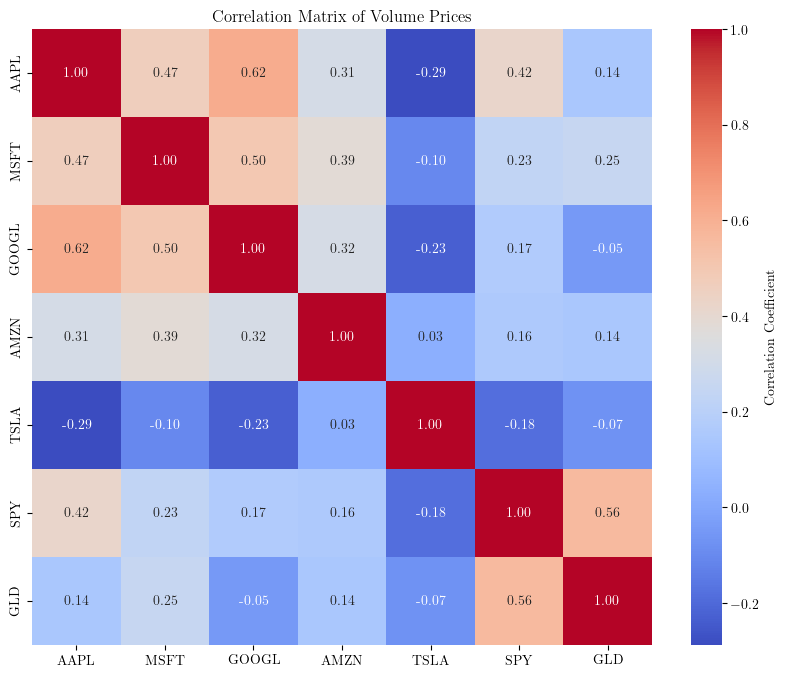

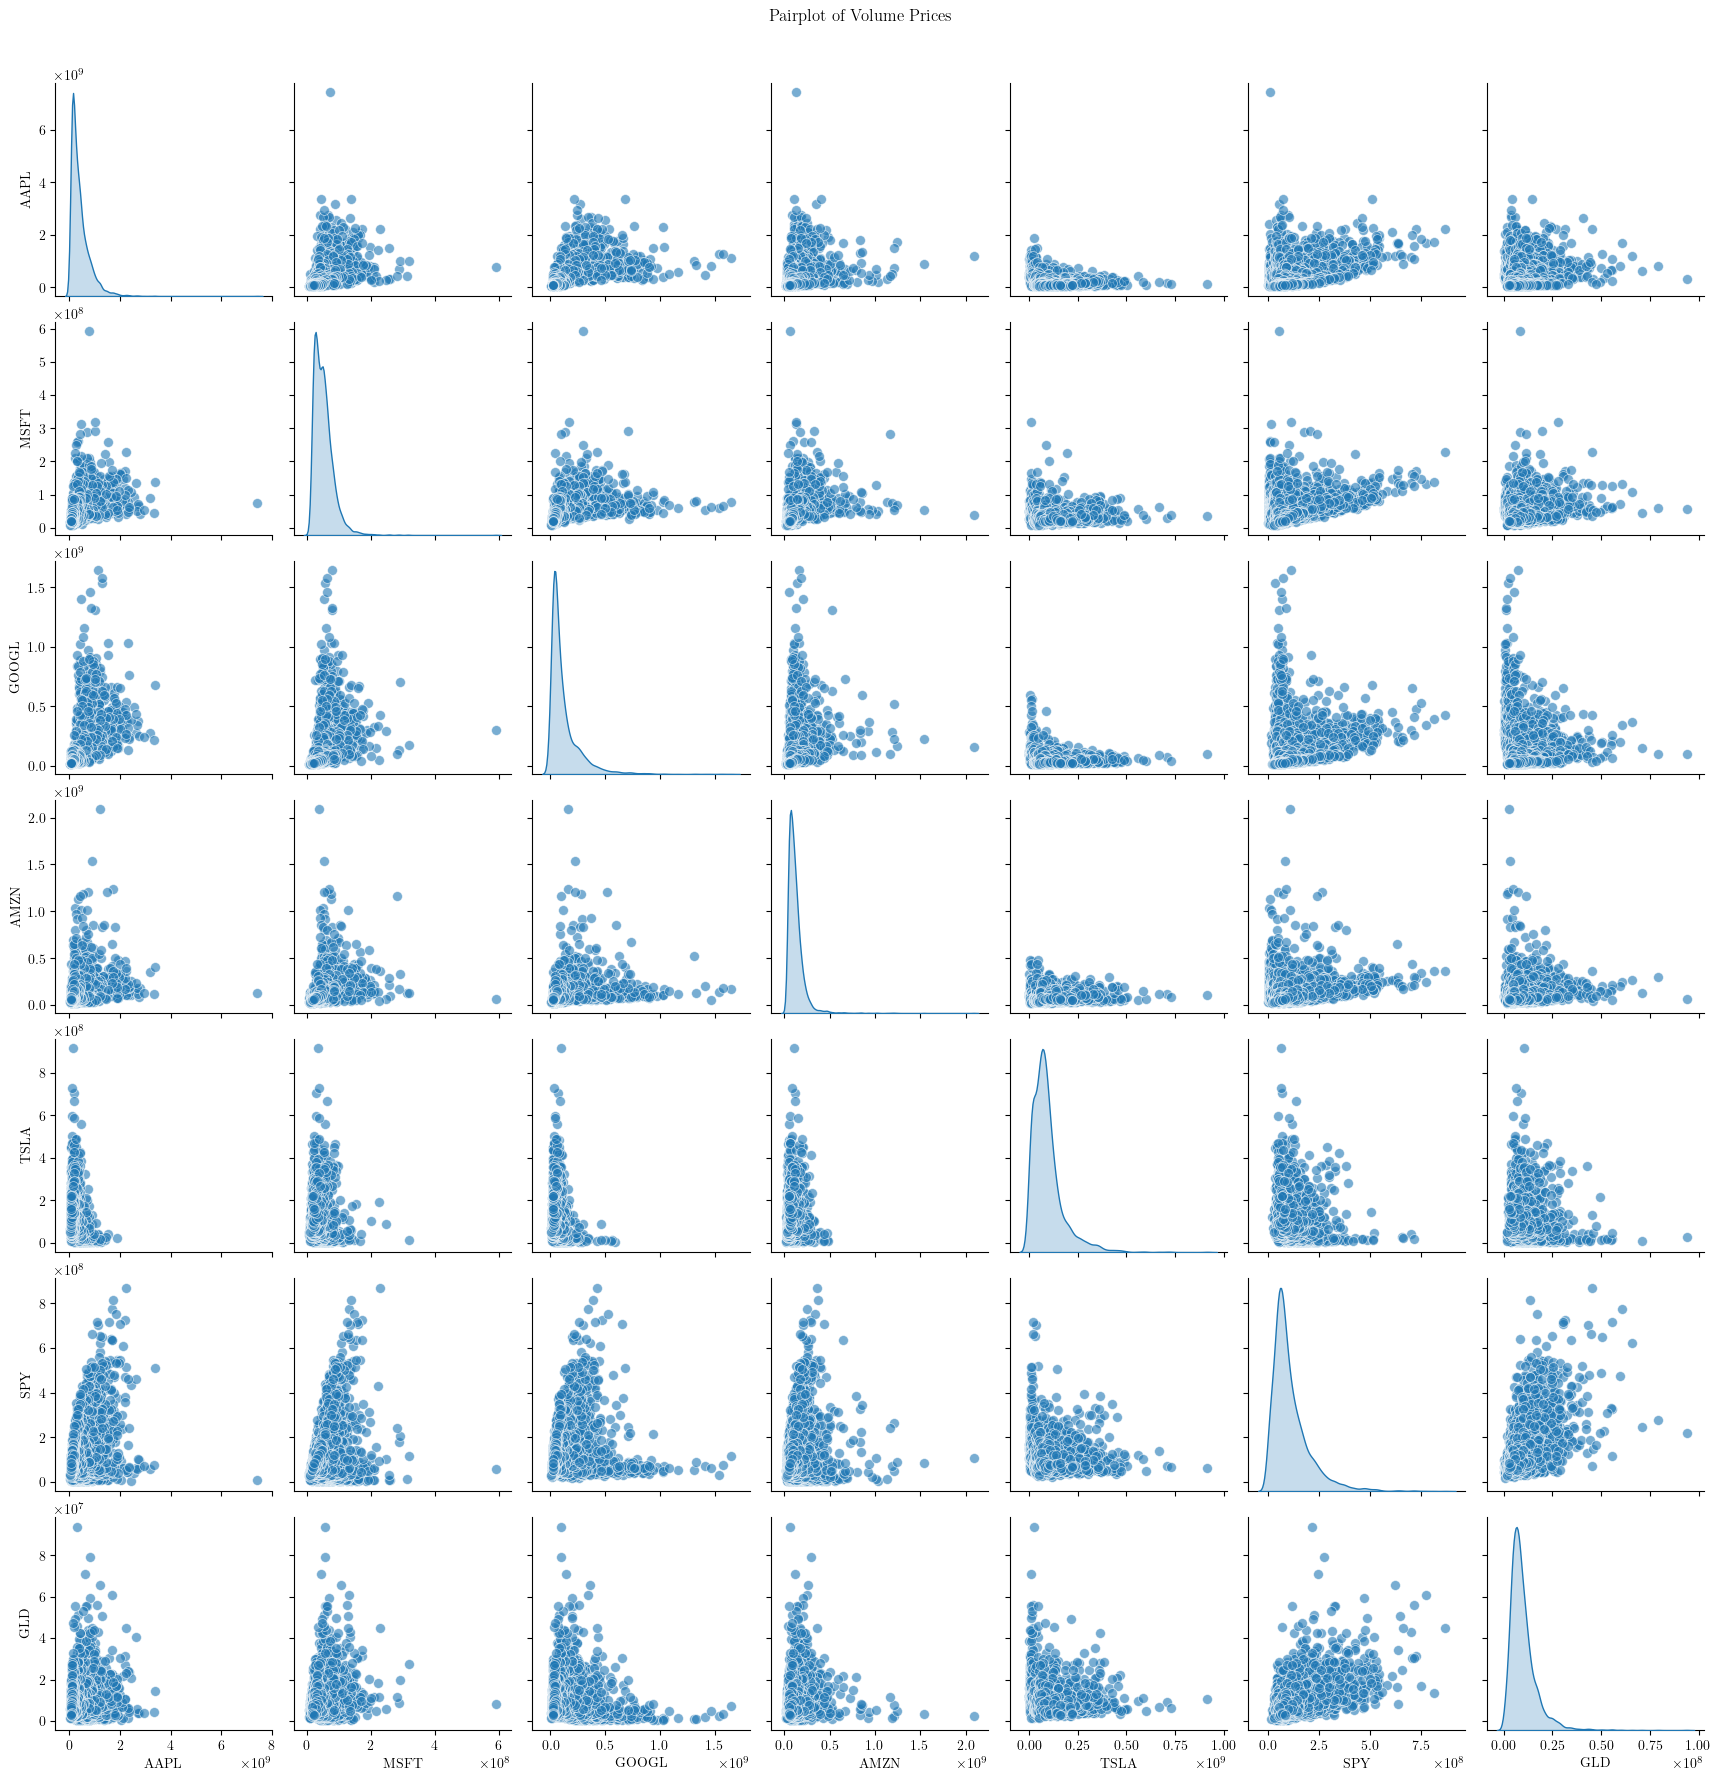

In [16]:
# Plotting "Volume" prices
plot_stock_data(data, column='Volume')

## Correlation Matrix of Volume
The testing of the correlation matrix of trading volumes shows a medium positive relationship between trading volumes at 0.616 of Apple (AAPL) and Google (GOOGL), which implies that their trading activities are often moving together. In terms of the smaller sample, there is a weaker correlation of 0.466 between Apple (AAPL) and Microsoft (MSFT), meaning some alignment of interest in trading. On the other hand, Tesla has a negative relationship with most other stocks, such as AAPL at -0.288 and GOOGL at -0.232, indicating the tendency of unique influences from the market to change the trading volume. Moreover, the gold ETF (GLD) shows a moderate positive relation with SPY of 0.560. That implies its trading volume runs somewhat in line with broader market activities but is less correlated with individual stocks, thus indicating gold's potential diversification asset.

           AAPL      MSFT     GOOGL      AMZN      TSLA       SPY       GLD
AAPL   1.000000  0.483187  0.532945  0.376759  0.358698  0.564092  0.008086
MSFT   0.483187  1.000000  0.578277  0.442701  0.360058  0.707694  0.022059
GOOGL  0.532945  0.578277  1.000000  0.526349  0.341387  0.647641  0.013214
AMZN   0.376759  0.442701  0.526349  1.000000  0.356112  0.486227  0.003571
TSLA   0.358698  0.360058  0.341387  0.356112  1.000000  0.430664  0.048093
SPY    0.564092  0.707694  0.647641  0.486227  0.430664  1.000000  0.052006
GLD    0.008086  0.022059  0.013214  0.003571  0.048093  0.052006  1.000000


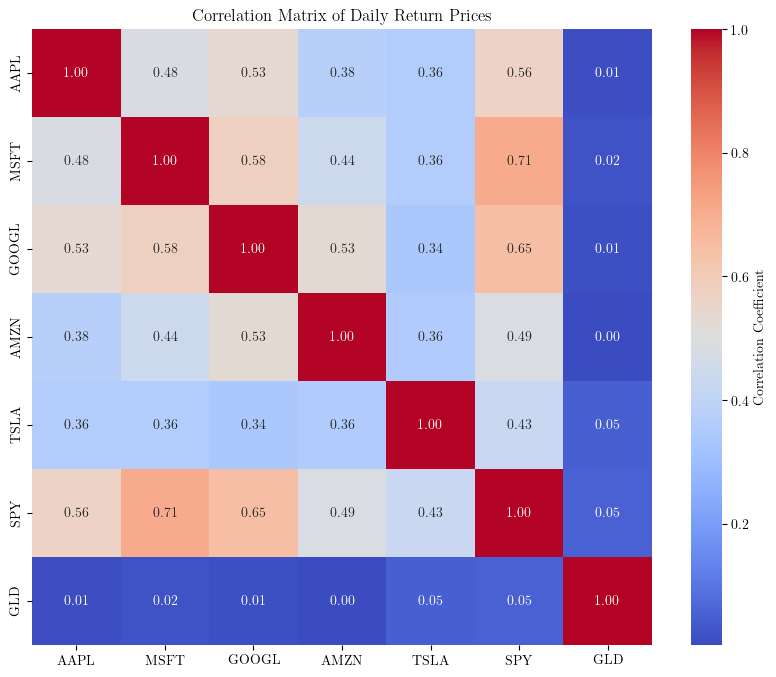

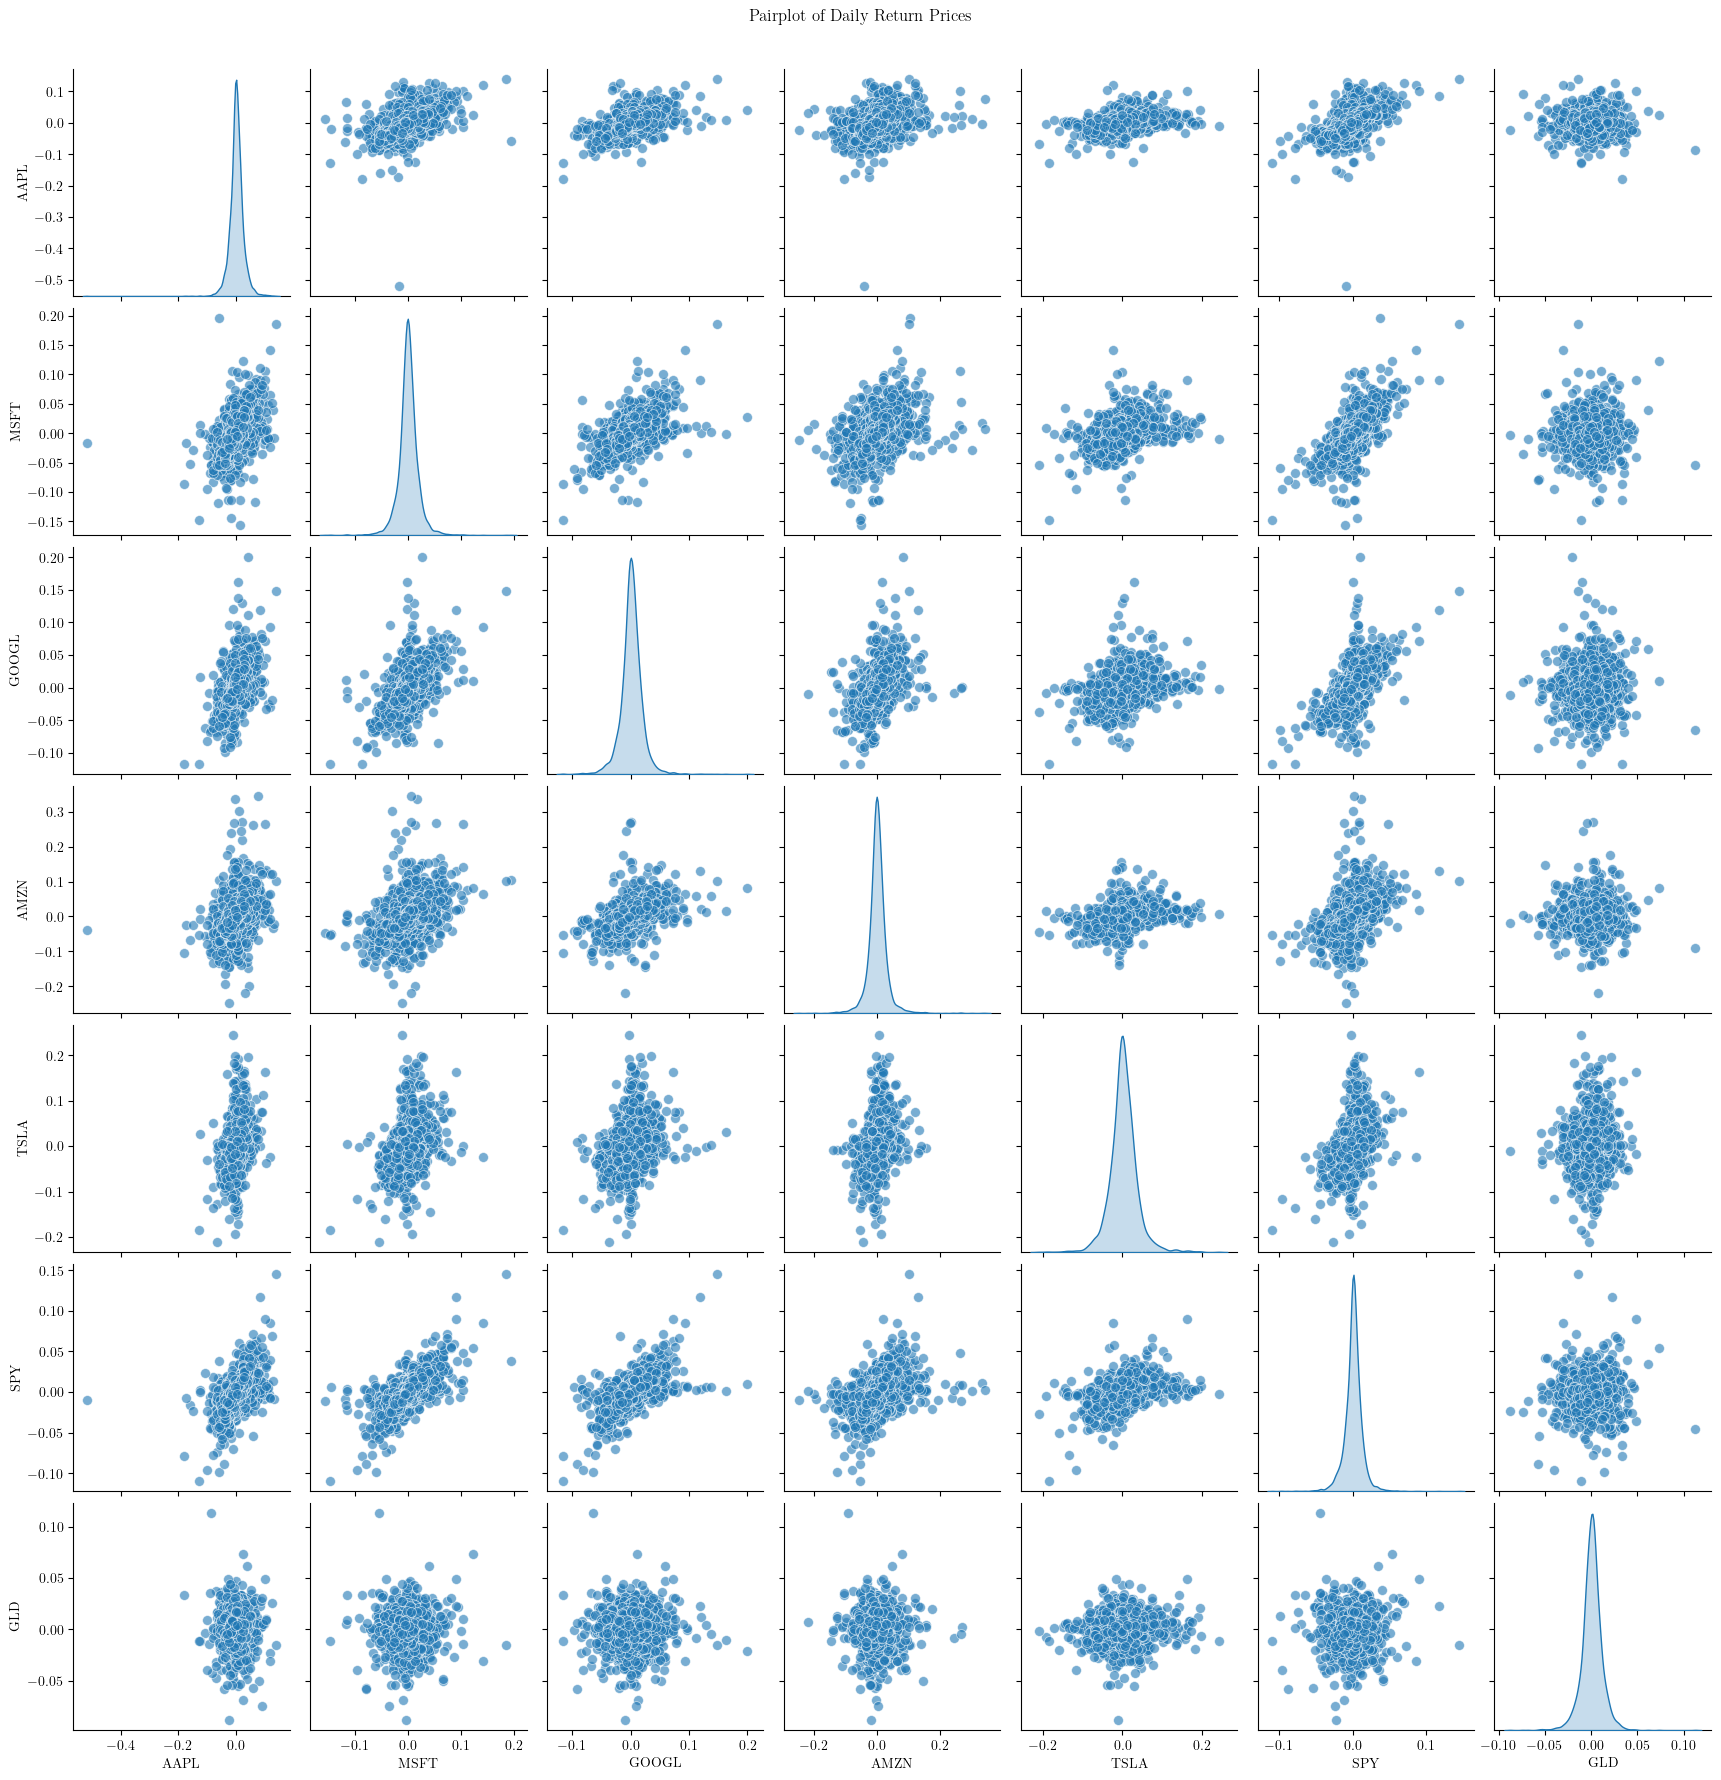

In [17]:
# Plotting "Daily Return"
plot_stock_data(data, column='Daily Return')

## Correlation Matrix of Daily Return
From the daily returns, the correlation matrix reports that Google and Microsoft are highly correlated at the highest of 0.578, meaning their daily price changes align with one another. GOOGL is also highly correlated with SPY at 0.648, which does confirm its influence within the market. On the contrary, there exists a moderate level of correlation between Apple and SPY, whereas the score stands at 0.564; hence, there is the reasonability to associate themselves with the conditions of the market. Similarly, AMZN shares exhibit a relationship of 0.443 with MSFT compared to 0.451 with the technology stock. Similarly, TSLA is associated with a weaker link to technology stocks and has a correlation of 0.359 with AAPL and 0.360 with MSFT. Finally, the Gold ETF, GLD, has minuscule correlations with the sample stocks; the largest is a mere 0.048 with TSLA. This underlines that gold is indeed a non-correlated asset concerning equities. Overall, these correlations show strong alignment between tech stocks and between tech stocks and the wider market, with the exception of gold, which remains in no correlation.

   Asset  VaR (95%)  Sharpe Ratio
0   AAPL  -0.036580      0.052116
1   MSFT  -0.028457      0.029333
2  GOOGL  -0.028443      0.044936
3   AMZN  -0.042883      0.037770
4   TSLA  -0.050881      0.062026


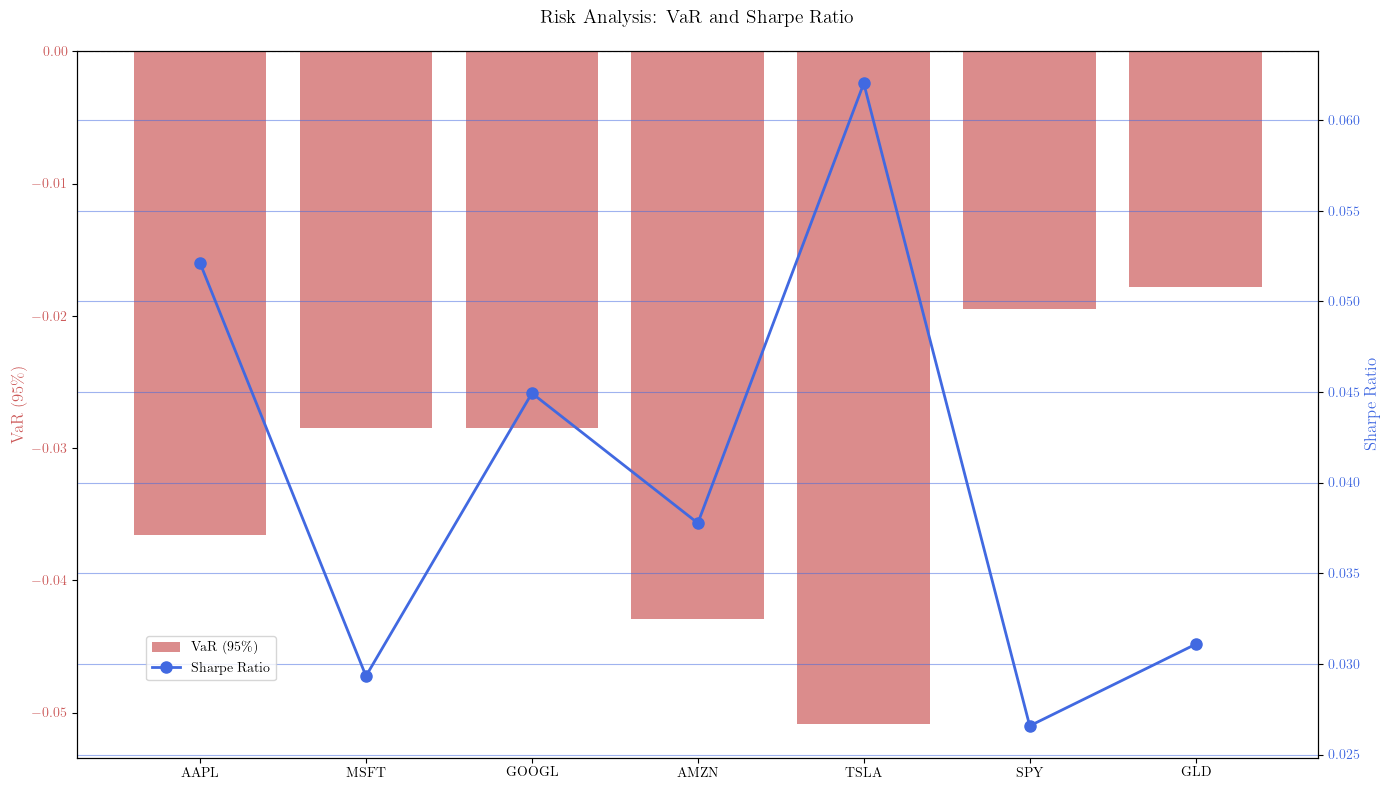

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of assets
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'SPY', 'GLD']

# Create a dictionary to store dataframes for each asset
data = {}

# Loop through each asset to load
for asset in assets:
    # Define the file path
    file_path = f'../data/{asset}_enhanced_data.csv'
    
    # Load the data into a DataFrame
    df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    data[asset] = df

# Risk-free rate (assumed as a daily rate corresponding to ~2% annual rate)
risk_free_rate = 0.00005

# Function to calculate VaR and Sharpe Ratio for a given dataset
def calculate_risk_metrics(df, confidence_level=0.95):
    """
    Calculate the Value at Risk (VaR) and Sharpe Ratio for the given data.

    Parameters:
    - df: DataFrame containing the stock data with 'Daily Return' and 'Volatility'.
    - confidence_level: The confidence level for VaR calculation (default is 95%).

    Returns:
    - var: Calculated VaR at the given confidence level.
    - sharpe_ratio: Calculated Sharpe Ratio for the data.
    """
    # Calculate VaR using the historical method
    sorted_returns = np.sort(df['Daily Return'].dropna())
    index_at_var = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[index_at_var]
    
    # Calculate average return and standard deviation of returns
    average_return = df['Daily Return'].mean()
    volatility = df['Volatility'].mean()  # Already annualized in the data

    # Calculate Sharpe Ratio
    sharpe_ratio = (average_return - risk_free_rate) / volatility
    
    return var, sharpe_ratio

# Calculate VaR and Sharpe Ratio for each dataset
risk_metrics = []

for asset, df in data.items():
    var, sharpe_ratio = calculate_risk_metrics(df)
    risk_metrics.append({
        'Asset': asset,
        'VaR (95%)': var,
        'Sharpe Ratio': sharpe_ratio
    })

# Create a DataFrame for the risk metrics
risk_metrics_df = pd.DataFrame(risk_metrics)
print(risk_metrics_df.head())

# Visualize the results with a professional color palette
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot VaR values
ax1.bar(risk_metrics_df['Asset'], risk_metrics_df['VaR (95%)'], color='indianred', label=r'VaR $(95\%)$', alpha=0.7)
ax1.set_ylabel(r'VaR $(95\%)$', color='indianred', fontsize=12, fontweight='bold')
ax1.set_title('Risk Analysis: VaR and Sharpe Ratio', fontsize=14, fontweight='bold', pad=20)
ax1.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax1.tick_params(axis='y', labelcolor='indianred')

# Create a twin Axes sharing the x-axis for Sharpe Ratio
ax2 = ax1.twinx()
ax2.plot(risk_metrics_df['Asset'], risk_metrics_df['Sharpe Ratio'], color='royalblue', marker='o', markersize=8, linewidth=2, label='Sharpe Ratio')
ax2.set_ylabel('Sharpe Ratio', color='royalblue', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Add a legend and grid
fig.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1), bbox_transform=ax1.transAxes, fontsize=10)
ax1.grid(False)
ax2.grid(True, color='royalblue', alpha = 0.5)

# Improve layout and spacing
plt.tight_layout()
plt.show()


   Asset  VaR (95%)  Sharpe Ratio
0   AAPL   0.042079      0.045658
1   MSFT   0.032261      0.025637
2  GOOGL   0.032224      0.040558
3   AMZN   0.052928      0.031868
4   TSLA   0.060897      0.056971


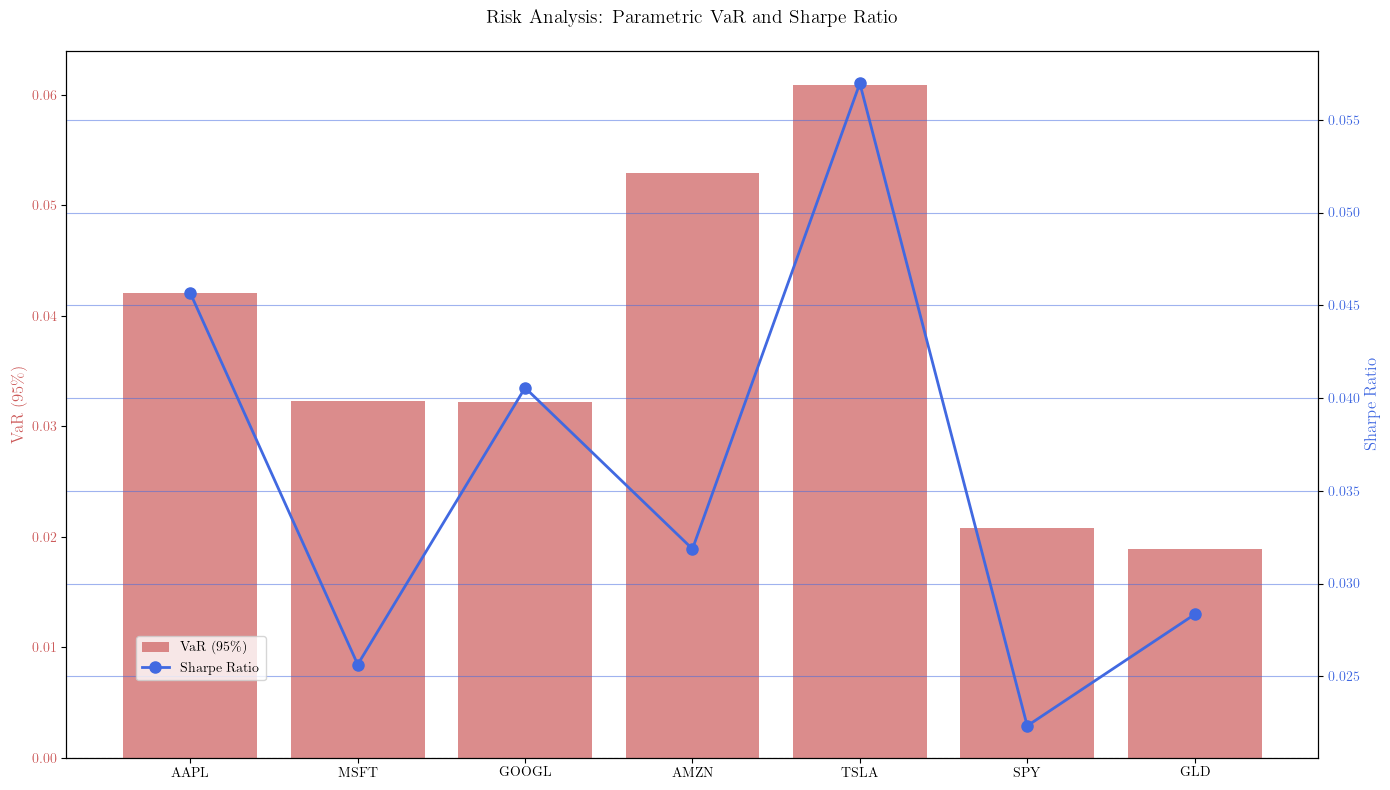

In [19]:
# Function to calculate Parametric VaR and Sharpe Ratio for a given dataset
def calculate_risk_metrics_parametric(df, confidence_level=0.95):
    """
    Calculate the Parametric Value at Risk (VaR) and Sharpe Ratio for the given data.

    Parameters:
    - df: DataFrame containing the stock data with 'Daily Return' and 'Volatility'.
    - confidence_level: The confidence level for VaR calculation (default is 95%).

    Returns:
    - var: Calculated Parametric VaR at the given confidence level.
    - sharpe_ratio: Calculated Sharpe Ratio for the data.
    """
    # Calculate the mean and standard deviation of daily returns
    mean_return = df['Daily Return'].mean()
    std_deviation = df['Daily Return'].std()

    # Get the Z-score for the given confidence level
    z_score = norm.ppf(1 - confidence_level)

    # Calculate Parametric VaR using the formula
    var = mean_return - z_score * std_deviation
    
    # Calculate Sharpe Ratio
    sharpe_ratio = (mean_return - risk_free_rate) / std_deviation
    
    return var, sharpe_ratio

# Calculate VaR and Sharpe Ratio for each dataset
risk_metrics = []

for asset, df in data.items():
    var, sharpe_ratio = calculate_risk_metrics_parametric(df)
    risk_metrics.append({
        'Asset': asset,
        'VaR (95%)': var,
        'Sharpe Ratio': sharpe_ratio
    })

# Create a DataFrame for the risk metrics
risk_metrics_df = pd.DataFrame(risk_metrics)
print(risk_metrics_df.head())

# Visualize the results with a professional color palette
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot VaR values
ax1.bar(risk_metrics_df['Asset'], risk_metrics_df['VaR (95%)'], color='indianred', label=r'VaR $(95\%)$', alpha=0.7)
ax1.set_ylabel(r'VaR $(95\%)$', color='indianred', fontsize=12, fontweight='bold')
ax1.set_title('Risk Analysis: Parametric VaR and Sharpe Ratio', fontsize=14, fontweight='bold', pad=20)
ax1.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax1.tick_params(axis='y', labelcolor='indianred')

# Create a twin Axes sharing the x-axis for Sharpe Ratio
ax2 = ax1.twinx()
ax2.plot(risk_metrics_df['Asset'], risk_metrics_df['Sharpe Ratio'], color='royalblue', marker='o', markersize=8, linewidth=2, label='Sharpe Ratio')
ax2.set_ylabel('Sharpe Ratio', color='royalblue', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Add a legend and grid
fig.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1), bbox_transform=ax1.transAxes, fontsize=10)
ax1.grid(False)
ax2.grid(True, color='royalblue', alpha=0.5)

# Improve layout and spacing
plt.tight_layout()
plt.show()

## Mathematical Formulas for VaR and Sharpe Ratio

### Value at Risk (VaR)

#### 1. Historical Method

The Historical VaR is based on actual historical returns and does not assume any specific distribution:

- **Formula**:

  $\text{VaR}_{\alpha} = -\text{sorted\_returns}[i]$

  where:
  - $\text{sorted\_returns}$ are the sorted historical daily returns of the asset.
  - $i$ is the index such that $i = [ N \times (1-\alpha) ]$, where $N$ is the total number of returns and $\alpha$ is the confidence level (e.g., $95\%$).

- **Explanation**: The Historical VaR is the return at the $(1-\alpha)$ percentile of the sorted historical returns, which indicates the potential loss at a given confidence level.

#### 2. Parametric Method (Variance-Covariance)

The Parametric VaR assumes that returns are normally distributed:

- **Formula**:

  $\text{VaR}_{\alpha} = \mu - Z \cdot \sigma$

  where:
  - $\mu$ is the mean of the daily returns.
  - $Z$ is the $Z$-score corresponding to the desired confidence level (e.g., $1.645$ for $95\%$ confidence).
  - $\sigma$ is the standard deviation of the daily returns.

- **Explanation**: The Parametric VaR uses the normal distribution of returns to estimate the potential loss. The $Z$-score accounts for the confidence level, and the product of the $Z$-score and standard deviation represents the potential deviation from the mean return.

### Sharpe Ratio

The Sharpe Ratio measures the risk-adjusted return of an investment:

- **Formula**:

  $\text{Sharpe Ratio} = \frac{\bar{R} - R_f}{\sigma}$

  where:
  - $\bar{R}$ is the average return of the asset.
  - $R_f$ is the risk-free rate of return.
  - $\sigma$ is the standard deviation of the asset's returns.

- **Explanation**: The Sharpe Ratio calculates the excess return (above the risk-free rate) per unit of risk (volatility). A higher Sharpe Ratio indicates better risk-adjusted performance, meaning the asset provides more return for each unit of risk taken.

### Notes

- **Confidence Level for VaR**: Common confidence levels used are $95\%$ and $99\%$, with corresponding $Z$-scores of approximately $1.645$ and $2.33$, respectively.
  
- **Risk-Free Rate for Sharpe Ratio**: The risk-free rate is often derived from short-term government bonds and is used as a baseline for measuring the asset's performance against a theoretically risk-free investment.


## Analysis of VaR and Sharpe Ratio

### Value at Risk (VaR) Comparison

- **Historical Method**: 
  - Shows potential losses as negative values (e.g., TSLA at -5.09%), reflecting empirical historical losses.
  - Indicates **TSLA** and **AMZN** have the highest potential for daily loss.

- **Parametric Method**:
  - Reports VaR as positive values (e.g., TSLA at 6.09%), reflecting theoretical risk based on normal distribution assumptions.
  - Confirms **TSLA** and **AMZN** as the riskiest assets.

### Sharpe Ratio Comparison

- **Historical Method**:
  - **TSLA** has the highest Sharpe Ratio (0.062), indicating strong risk-adjusted returns based on historical data.

- **Parametric Method**:
  - **TSLA** again leads (0.057), though values are slightly more conservative due to distribution assumptions.

### Summary

- **TSLA** and **AMZN** consistently exhibit the highest risk and returns in both methods.
- Use the **Historical Method** for empirical insights; use the **Parametric Method** for theoretical assessments.
- **TSLA** offers high-risk, high-return potential, suitable for aggressive investors.


Minimum Prices (Start of Period): [75.0875015258789, 160.6199951171875, 68.43399810791016, 94.90049743652344, 28.68400001525879, 324.8699951171875, 143.9499969482422]
Maximum Prices (End of Period): [129.92999267578125, 239.82000732421875, 88.2300033569336, 84.0, 123.18000030517578, 382.4299926757813, 169.63999938964844]
Growth Percentages: [73.03810892016547, 49.308937003296094, 28.927149949368886, -11.486238461304701, 329.4380150594364, 17.717855888116322, 17.8464765446596]


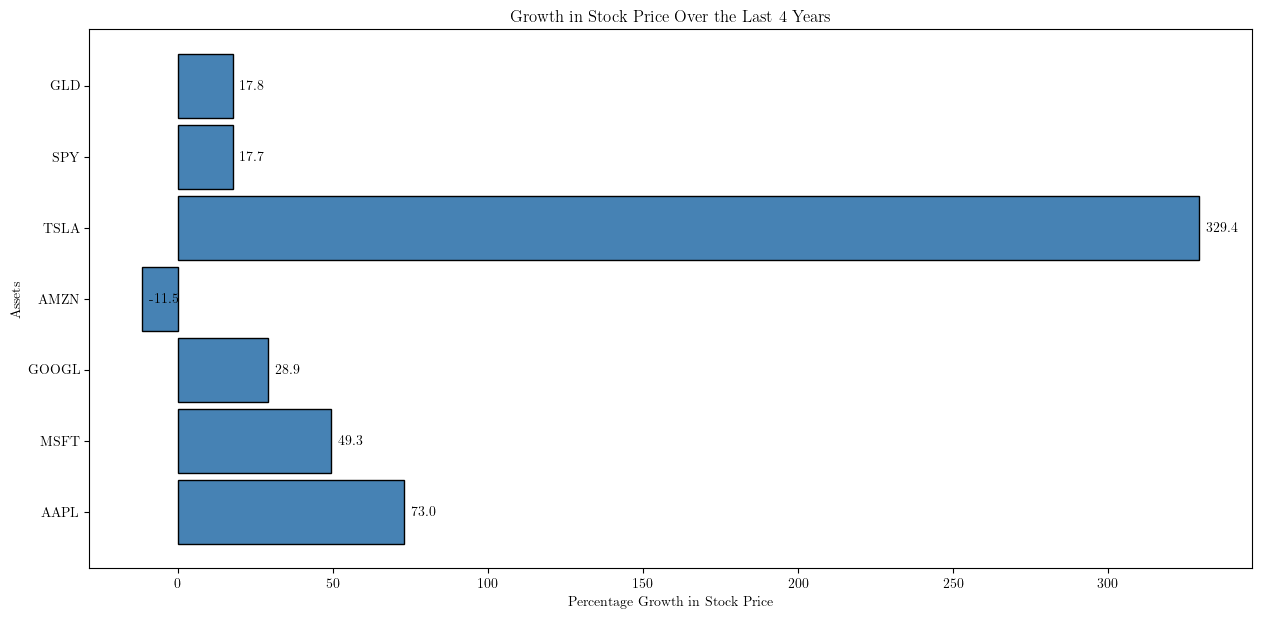

In [20]:
# Calculate stock price growth for the last 10 years
start_date = '2020-01-01'
end_date = '2023-12-31'

min_prices = []
max_prices = []
growth_percentages = []

for asset, df in data.items():
    # Find the initial and final prices
    initial_price = df.loc[df.index >= start_date, 'Close'].iloc[0]
    final_price = df.loc[df.index <= end_date, 'Close'].iloc[-1]
    
    # Calculate growth percentage
    growth_percentage = ((final_price - initial_price) / initial_price) * 100
    
    # Store results
    min_prices.append(initial_price)
    max_prices.append(final_price)
    growth_percentages.append(growth_percentage)

# Print minimum and maximum prices
print("Minimum Prices (Start of Period):", min_prices)
print("Maximum Prices (End of Period):", max_prices)
print("Growth Percentages:", growth_percentages)

# Visualize the growth
fig, ax = plt.subplots(figsize=(15, 7))
ax.barh(y=assets, width=growth_percentages, height=0.9, color='steelblue', edgecolor='black')

# Annotate the bars with growth percentages
for i, (growth, asset) in enumerate(zip(growth_percentages, assets)):
    ax.annotate(f'{round(growth, 1)}%', (growth, i), xytext=(5, 0), textcoords='offset points', va='center')

ax.set_xlabel('Percentage Growth in Stock Price')
ax.set_ylabel('Assets')
ax.set_title('Growth in Stock Price Over the Last 4 Years')
plt.show()

## Stock Price Growth Analysis (2020-2023)

1. **Tesla (TSLA)**
   - **Growth**: 329.44%
   - **Comment**: Exceptional growth driven by increased market demand and expansion in electric vehicles.

2. **Apple (AAPL)**
   - **Growth**: 73.04%
   - **Comment**: Strong performance due to continued innovation and market leadership.

3. **Microsoft (MSFT)**
   - **Growth**: 49.31%
   - **Comment**: Solid growth supported by diversification and consistent performance in the tech sector.

4. **Google (GOOGL)**
   - **Growth**: 28.93%
   - **Comment**: Steady growth reflecting robust market position and technological advancements.

5. **Gold (GLD)**
   - **Growth**: 17.85%
   - **Comment**: Moderate growth highlighting its role as a stable investment.

6. **S&P 500 ETF (SPY)**
   - **Growth**: 17.72%
   - **Comment**: Reflects overall market uptrend and economic recovery.

7. **Amazon (AMZN)**
   - **Growth**: -11.49%
   - **Comment**: Decline due to challenges and market conditions impacting performance.

### Summary

- **Top Performers**: Tesla, Apple, and Microsoft show the highest growth, driven by innovation and market trends.
- **Moderate Growth**: Gold and SPY demonstrate stability and resilience.
- **Underperformer**: Amazon experienced a decline, likely due to company-specific challenges.
